# Exploratory Data Analysis

### Let's import the usual libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
%load_ext google.cloud.bigquery

## Let's load credentials

In [3]:
%env GOOGLE_APPLICATION_CREDENTIALS = ../dsi-capstone-f19-group-1-198add732865.json

env: GOOGLE_APPLICATION_CREDENTIALS=../dsi-capstone-f19-group-1-198add732865.json


## Let's explore the table and see what's interesting

In [9]:
%%bigquery df_s
SELECT * from tweets.all_valid_tweets limit 10;

In [15]:
df_s

,contributors,coordinates,created_at,display_text_range,favorite_count,favorited,full_text,latitude,longitude,id,...,victor_white,jordan_baker,yvette_smith,dante_parker,mckenzie_cochran,tyree_woodson,other_murders_august,other_murders_before,full_text_cleaned,is_retweet
0,,,2014-08-18 23:28:47+00:00,"[0, 136]",0,False,Peace to the brother who saw his friend killed...,None,None,501511051817402400,...,0,0,0,0,0,0,0,0,peace to the brother who saw his friend killed...,False
1,,,2014-08-15 01:42:42+00:00,"[0, 76]",0,False,RT @ryanjreilly: #Ferguson last night versus t...,None,None,500095205320560640,...,0,0,0,0,0,0,0,0,ferguson last night versus tonight $URL$,True
2,,,2014-08-10 04:07:21+00:00,"[0, 138]",0,False,"See what they do to concerned citizens, while ...",None,None,498319665794646000,...,0,0,0,0,0,0,0,0,see what they do to concerned citizens while i...,False
3,,,2014-08-15 15:38:15+00:00,"[0, 115]",1,False,@Mr_GQ_ It's like 2 months earlier. Where's th...,None,None,500305475993227260,...,0,0,0,0,0,0,0,0,its like 2 months earlier wheres the hat? did ...,False
4,,,2014-08-25 16:55:18+00:00,"[0, 140]",0,False,RT @CitizenRadio: Remember Tony Blair? He’s st...,None,None,503948746309517300,...,0,0,0,0,0,0,0,0,remember tony blair? he’s still awful huffpost...,True
5,,,2014-08-15 19:29:11+00:00,"[0, 70]",0,False,"RT @DatJuanDude: No Justice No Peace, Don't Tr...",None,None,500363591976247300,...,0,0,0,0,0,0,0,0,no justice no peace dont trust the police ferg...,True
6,,,2014-08-13 16:57:45+00:00,"[0, 39]",4,False,“@DOELO_239: JUSTICE FOR #MIKEBROWN” #🙌,None,None,499600706975055900,...,0,0,0,0,0,0,0,0,“ justice for mikebrown” 🙌,True
7,,,2014-08-14 15:43:13+00:00,"[0, 102]",0,False,RT @ndilettante: PLEASE RT THERE IS TOO MUCH M...,None,None,499944337435013100,...,0,0,0,0,0,0,0,0,please rt there is too much misinformation goi...,True
8,,,2014-08-18 19:35:00+00:00,"[0, 140]",0,False,RT @KathyAngel2: @Politics_PR @stphil The fact...,None,None,501452221230641150,...,0,0,0,0,0,0,0,0,the fact michaelbrown may have had marijuana i...,True
9,,,2014-08-18 02:49:27+00:00,"[0, 87]",0,False,RT @PDPJ: #Ferguson 5 ambulances being brought...,None,None,501199165490081800,...,0,0,0,0,0,0,0,0,ferguson 5 ambulances being brought into stagi...,True


In [18]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 97 columns):
contributors                               10 non-null object
coordinates                                10 non-null object
created_at                                 10 non-null datetime64[ns, UTC]
display_text_range                         10 non-null object
favorite_count                             10 non-null int64
favorited                                  10 non-null bool
full_text                                  10 non-null object
latitude                                   0 non-null object
longitude                                  0 non-null object
id                                         10 non-null int64
id_str                                     10 non-null object
in_reply_to_screen_name                    10 non-null object
in_reply_to_status_id                      2 non-null float64
in_reply_to_status_id_str                  2 non-null object
in_reply_to_user_id     

With the info function and the sample, I think it'd be interesting to dive deeper into some questions. 

- How frequent are tweets?
- How frequent are retweets?
- User Location and place to understand if some regions drive more conversation
- Sensitive as a proxy for sentiment
- Hashtags as a proxy for topic modeling

### Frequency of Tweets

In [183]:
%%bigquery df_ft
SELECT day_of_tweet, count(*) as day_tweets,
    count(*)/1440 as tpm
    from tweets.all_valid_tweets
    where is_retweet = False
    group by day_of_tweet
    order by day_of_tweet;

In [111]:
df_ft

,day_of_tweet,day_tweets,tpm
0,1,3887,2.699306
1,2,2967,2.060417
2,3,2162,1.501389
3,4,1947,1.352083
4,5,1692,1.175000
5,6,1428,0.991667
6,7,1057,0.734028
7,8,896,0.622222
8,9,6496,4.511111
9,10,32844,22.808333


([<matplotlib.axis.XTick at 0x11ce920b8>,
 <a list of 23 Text xticklabel objects>)

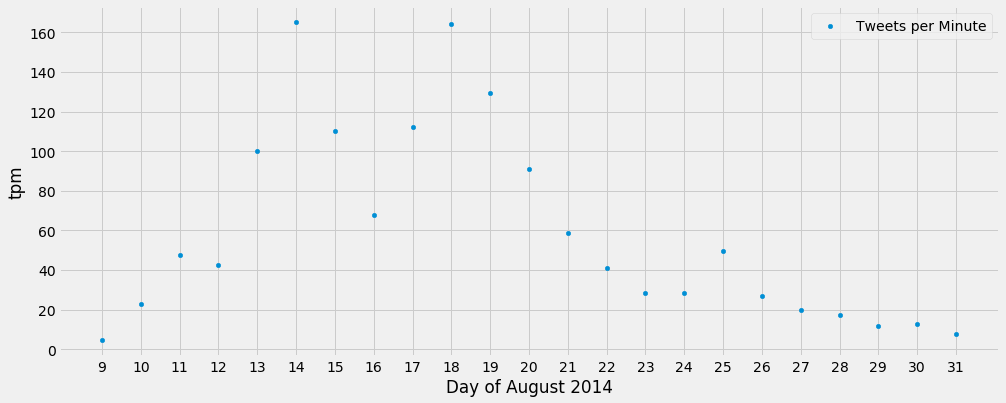

In [184]:
df_ft = df_ft[8:]
ax = df_ft.plot(x='day_of_tweet',
             y='tpm',
             kind='scatter',
             figsize=(15,6),
             label='Tweets per Minute')
plt.xlabel('Day of August 2014')

xticks = np.arange(9,32,1)
plt.xticks(xticks)

Original tweets seem to have spiked at nearly 160 tweets per minute on August 14th and 18th. It will be interesting to see what happened on those days.

### Frequency of Reweets

In [114]:
%%bigquery df_fr
SELECT day_of_tweet, count(*) as day_tweets,
    count(*)/1440 as tpm
    from tweets.all_valid_tweets
    where is_retweet = True
    group by day_of_tweet
    order by day_of_tweet;

In [115]:
df_fr

,day_of_tweet,day_tweets,tpm
0,1,7510,5.215278
1,2,4122,2.862500
2,3,2585,1.795139
3,4,1747,1.213194
4,5,1346,0.934722
5,6,1842,1.279167
6,7,1759,1.221528
7,8,1318,0.915278
8,9,42817,29.734028
9,10,139555,96.913194


([<matplotlib.axis.XTick at 0x1209b4240>,
 <a list of 23 Text xticklabel objects>)

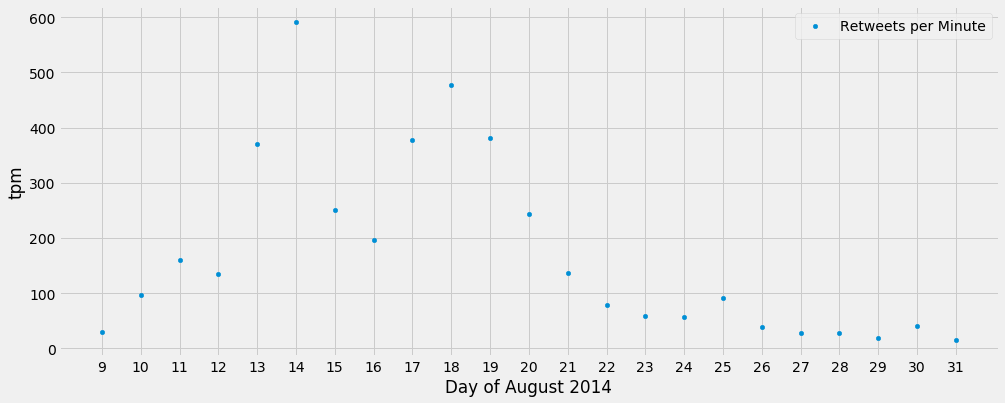

In [185]:
df_fr = df_fr[8:]
ax = df_fr.plot(x='day_of_tweet',
             y='tpm',
             kind='scatter',
             figsize=(15,6),
             label='Retweets per Minute')
plt.xlabel('Day of August 2014')

xticks = np.arange(9,32,1)
plt.xticks(xticks)

Retweet activity resembles that of original tweets, with maximums on August 14th and 18th. Since this type of activity only included sharing content created by someone else, it makes sense that the numbers are higher.

([<matplotlib.axis.XTick at 0x11916acf8>,
 <a list of 23 Text xticklabel objects>)

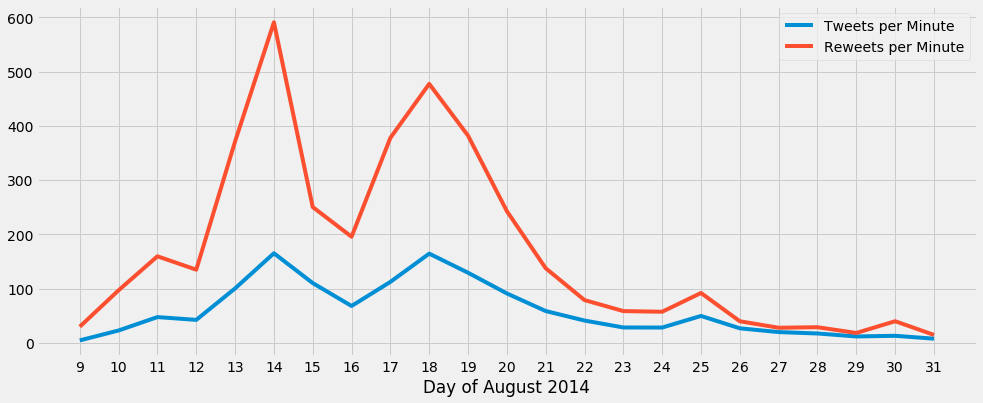

In [133]:
ax = df_ft.plot(x='day_of_tweet',
             y='tpm',
             kind='line',
             figsize=(15,6),
             label='Tweets per Minute')
df_fr.plot(x='day_of_tweet',
             y='tpm',
             kind='line',
             label='Reweets per Minute',
             ax=ax)
plt.xlabel('Day of August 2014')

xticks = np.arange(9,32,1)
plt.xticks(xticks)

In this plot it is clear that the behaviour of tweets and retweets resembles the other. Maximum activity occured on the 14th, 18th and 25th of August.

### User location and Place

The dataset shows 2 fields related to location: place and user location. Let's examine what is contained on each field.

In [232]:
%%bigquery df_ul
SELECT user_location, count(*) as total
    from tweets.all_valid_tweets
    where is_retweet = False
    group by user_location;

In [248]:
df_ul2 = df_ul[:9].copy()

new_row = pd.DataFrame(data = {
    'total' : [df_ul['total'][9:].sum()],
    'user_location' : 'other'
})

new_row.rename(index={0: 10}, inplace=True)

df_ul2 = pd.concat([df_ul2, new_row])

/Users/rosarodriguez/anaconda3/envs/coms007/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


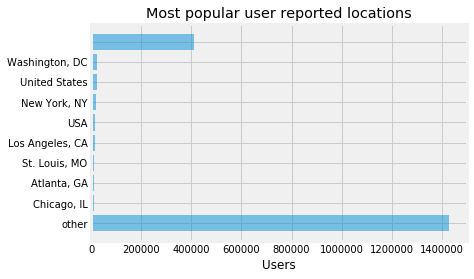

In [250]:
locations = list(df_ul2.user_location)
y_pos = np.arange(len(df_ul2))
count = list(df_ul2.total)

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, locations)
plt.xlabel('Users')
plt.title('Most popular user reported locations')
plt.gca().invert_yaxis()

plt.show()

In [236]:
df_ul = df_ul.sort_values(by='total', ascending=False).reset_index(drop=True)
df_ul[:50]

,user_location,total
0,,409835
1,"Washington, DC",24264
2,United States,22849
3,"New York, NY",18693
4,USA,16737
5,"Los Angeles, CA",16362
6,"St. Louis, MO",13080
7,"Atlanta, GA",12550
8,"Chicago, IL",11896
9,"Brooklyn, NY",9416


User location seems to be self reported, and the most common value is empty, and some other categories are.... creative... Let's look at the place field, which might be more promising.

In [4]:
%%bigquery df_pl
SELECT place, count(*) as total, is_retweet
    from tweets.all_valid_tweets
    group by place, is_retweet;

In [252]:
a = df_pl['place'][0]
a

"{'attributes': {}, 'bounding_box': {'coordinates': [[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], 'type': 'Polygon'}, 'contained_within': [], 'country': 'United States', 'country_code': 'US', 'full_name': 'Manhattan, NY', 'id': '01a9a39529b27f36', 'name': 'Manhattan', 'place_type': 'city', 'url': 'https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json'}"

This field contains a dictionary. Let's pull data related to the country code, the state and the city. This might show where's support and information flowing through.

In [5]:
df_pl['country'] = 'NA'
df_pl['state'] = 'NA'
df_pl['city'] = 'NA'

In [20]:
for i in range(0,len(df_pl)):
    a = df_pl.loc[i, 'place']
    try:
        df_pl.loc[i, 'country'] = a.split('\'country_code\'')[1].split('\'')[1].strip()
    except:
        pass
    try:
        df_pl.loc[i, 'state'] = a.split('\'full_name\'')[1].split('\'')[1].split(', ')[1].strip()
    except:
        pass
    try:
        df_pl.loc[i, 'city'] = a.split('\'name\'')[1].split('\'')[1].strip()
    except:
        pass

Let's quickly see how the spots change with respect to the user_location field

In [38]:
df_pl2 = df_pl[df_pl['is_retweet']==False][:14].copy()

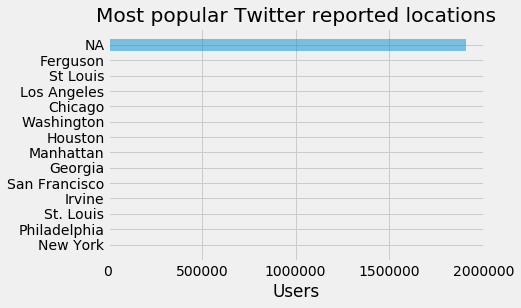

In [39]:
locations = list(df_pl2.city)
y_pos = np.arange(len(df_pl2))
count = list(df_pl2.total)

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, locations)
plt.xlabel('Users')
plt.title('Most popular Twitter reported locations')
plt.gca().invert_yaxis()

plt.show()

It is difficult to understand anything from this plot, as so many users leave their location protected. Let us ignore empty fields.

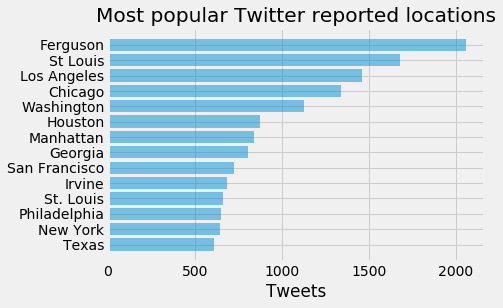

In [40]:
df_pl2 = df_pl[df_pl['is_retweet']==False][1:15].copy()
locations = list(df_pl2.city)
y_pos = np.arange(len(df_pl2))
count = list(df_pl2.total)

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, locations)
plt.xlabel('Tweets')
plt.title('Most popular Twitter reported locations')
plt.gca().invert_yaxis()

plt.show()

Here we can see that the largest source of original tweets is Missouri, and Twitter was used as a news broadcasting tool. 

Now, let's see the top 50 locations as a table.

In [29]:
df_pl = df_pl.sort_values(by='total', ascending=False).reset_index(drop=True)
df_pl[df_pl['is_retweet']==False][:50]

,place,total,is_retweet,country,state,city
1,,1907397,False,NA,NA,NA
2,"{'attributes': {}, 'bounding_box': {'coordinat...",2058,False,US,MO,Ferguson
3,"{'attributes': {}, 'bounding_box': {'coordinat...",1677,False,US,MO,St Louis
4,"{'attributes': {}, 'bounding_box': {'coordinat...",1460,False,US,CA,Los Angeles
5,"{'attributes': {}, 'bounding_box': {'coordinat...",1338,False,US,IL,Chicago
6,"{'attributes': {}, 'bounding_box': {'coordinat...",1130,False,US,DC,Washington
7,"{'attributes': {}, 'bounding_box': {'coordinat...",873,False,US,TX,Houston
8,"{'attributes': {}, 'bounding_box': {'coordinat...",839,False,US,NY,Manhattan
9,"{'attributes': {}, 'bounding_box': {'coordinat...",804,False,US,USA,Georgia
10,"{'attributes': {}, 'bounding_box': {'coordinat...",726,False,US,CA,San Francisco


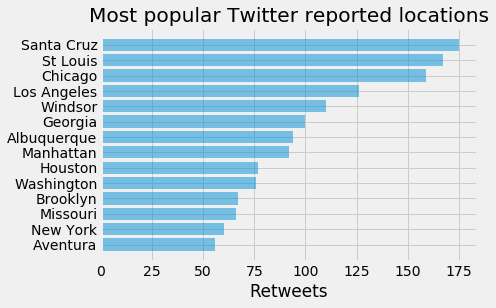

In [41]:
df_pl3 = df_pl[df_pl['is_retweet']==True][1:15].copy()
locations = list(df_pl3.city)
y_pos = np.arange(len(df_pl3))
count = list(df_pl3.total)

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, locations)
plt.xlabel('Retweets')
plt.title('Most popular Twitter reported locations')
plt.gca().invert_yaxis()

plt.show()

In [48]:
#Let's see the top 3 retweeting countries

df_co = df_pl.groupby(['country']).agg(['sum'])['total'].sort_values(by='sum', ascending=False)
df_c = df_co[1:4]

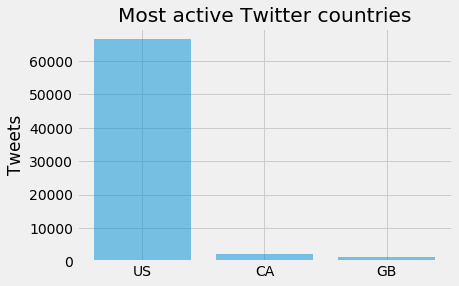

In [65]:
topics = df_c.index
y_pos = np.arange(len(df_c))
count = list(df_c['sum'])

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, topics)
plt.ylabel('Tweets')
plt.title('Most active Twitter countries')

plt.show()

Unsurprisingly, the most active countries during this period were English speaking

In [98]:
df = df_pl[df_pl['is_retweet']==False]
df = df[df['country'] == 'US']
mask = (df['state'].str.len() == 2)
df = df.loc[mask]
df = df.groupby(['state']).agg(['sum'])['total']
df

fig = go.Figure(data=go.Choropleth(
    locations=df.index, # Spatial coordinates
    z = df['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Tweets",
))

fig.update_layout(
    title_text = 'Source of unique tweets by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

We can see how the most common states for Twitter activity are Missouri, California, Texas and New York. This means that most content was created near the source of events and also by the most populated areas in the country.

In [99]:
df = df_pl[df_pl['is_retweet']==True]
df = df[df['country'] == 'US']
mask = (df['state'].str.len() == 2)
df = df.loc[mask]
df = df.groupby(['state']).agg(['sum'])['total']
df

fig = go.Figure(data=go.Choropleth(
    locations=df.index, # Spatial coordinates
    z = df['sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Retweets",
))

fig.update_layout(
    title_text = 'Source of retweets by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

It is interesting to see that there are, apparently, less retweets than tweets. This is due to the fact that the map only shows reported locations, and this might be hidden for retweets. Still the pattern follows, and the most common states are, after MO, California, Texas and New York - the most populated areas in the country.

### Sensitive content

From our data set we could start inferring emotion by understanding content labeled as sensitive. Let's start with a small sample of sensitive Tweets.

In [155]:
%%bigquery df_sen1
SELECT * 
    from tweets.all_valid_tweets
    where is_retweet = False and possibly_sensitive = True
    limit 10;

In [156]:
list(df_sen1['full_text'])

['What The Hell?? KKK Headed To Ferguson To Support Cop Who Killed Mike Brown “We Can’t Have Blacks Robbing And ... http://t.co/aPfmVJ56nr',
 "Michael Brown shooting: Could a newly released audio provide more clues on what led up to Michael Brown's shoo... http://t.co/QjkPSRs7kM",
 'Vet to #Ferguson cops: "If you\'re going to shoot my ass, go ahead and shoot me!" http://t.co/kBCxCzWwAy',
 'Support http://t.co/44oDZSIAIx, whose gracious owner is said to have distributed protective gear in #Ferguson! (Great product too!) RT pls',
 'Michael Brown Outrage, Or Lack Of, Reveals Who YOU Really Are http://t.co/pN1rEMEo2Z',
 "I'll be rocking w/ @NicoWellsMusic during the Half-Time Show at Unity &amp; Peace B-Ball Game tonight!! 5:30PM! #Ferguson http://t.co/6EVyNXuXcq",
 'I signed. -- Sign the #MikeBrown law petition. http://t.co/8qdSFbWpz2 A law req all LE to wear cameras while on duty. #Ferguson -- RT!',
 'At Eric Garner Rally, New York Labor Groups Support Both Police and Protestors http://t

It is not evident that something on the text makes these tweets sensitive. Let's see what is labeled as not sensitive.

In [157]:
%%bigquery df_sen2
SELECT * 
    from tweets.all_valid_tweets
    where is_retweet = False and possibly_sensitive = False
    limit 10;

In [158]:
list(df_sen2['full_text'])

['#Ferguson Police officer injured by Molotov cocktail (Picture) http://t.co/c88e5t8uft',
 '#OpFerguson: Anonymous Responds To Mike Brown’s Shooting Death By Police, Draws Line In the Sand | Liberaland http://t.co/n3eHH3QhgM :: YES.',
 'Is the heavy police crackdown in #Ferguson inevitable with so many militarized police depts in US? http://t.co/n5Pz5MbSnj',
 '@TalibKweli @jack DISE - SURRENDER (FERGUSON POLICE DISS)\nA MUST SEE!!! CLICK HERE\nhttp://t.co/ouAM5V5dCv\n#RIPMIKEBROWN #FERGUSON',
 'Support grows for Darren Wilson, officer who shot Ferguson teen Michael Brown http://t.co/QDJhJZtlK8',
 'There were 6 of us sitting on the grass. It took all these officers to tell us we had to "keep moving". #Ferguson http://t.co/BXzi6dlbWv',
 '6 to 8 times in the arm and head? All while facing forward? #HandsUp? #Ferguson has every right to be ENRAGED. http://t.co/bbVuYGiAmb',
 'The Death of Michael Brown, The Birth of a Movement [PHOTOS] - Photos - EBONY http://t.co/dNuuNYWlm1 #Ferguson',
 'W

Again, it doesn't seem evident what made a tweet be labeled as non sensitive, as there is link to a picture of an injured police officer. Let's see what tweets lack the flag.

In [159]:
%%bigquery df_sen3
SELECT * 
    from tweets.all_valid_tweets
    where is_retweet = False and possibly_sensitive is null
    limit 10;

In [160]:
list(df_sen3['full_text'])

['Peace to the brother who saw his friend killed in front of him and sharing his story so eloquently your in my thoughts brother #Ferguson',
 "@Mr_GQ_ It's like 2 months earlier. Where's the hat? Did the cops take it as a souvenir after killing #MichaelBrown",
 "Have the RWers found a way to blame #MikeBrown's horrific murder on Obama yet?",
 'I am shocked that the local media has not picked up what’s up at Chambers &amp; W. Florissant with fires, shots fired etc #Ferguson',
 "If you're justifying that that cop had a right to shoot #MikeBrown whom was unarmed, you're just as bad as the cop. #MTVHottest Nicki Minaj",
 '#ferguson @GovJayNixon presser he just basically said #Iquit',
 'rest in peace mike brown',
 "I can't believe POTUS sent reps to #MikeBrown's funeral but no one to #DarrenWilson's. #Ferguson",
 '@ManaPuddingFox The killing of #MikeBrown and the Police\'s shitty job of "investigating" the crim',
 'Props to the young men calmly taking control of #Ferguson tonight.  #gives m

There is cursing and violence in these tweets. There might be a threshold on Tqitter's end, which isn't evident here. Let's build a chart and see if we can understand more.

In [137]:
%%bigquery df_sc
SELECT possibly_sensitive, count(*) as total, is_retweet, day_of_tweet
    from tweets.all_valid_tweets
    group by possibly_sensitive, is_retweet, day_of_tweet
    order by day_of_tweet;

In [138]:
df_sc

,possibly_sensitive,total,is_retweet,day_of_tweet
0,None,889,False,1
1,True,112,True,1
2,False,2921,False,1
3,None,2556,True,1
4,True,77,False,1
5,False,4842,True,1
6,None,541,False,2
7,False,3139,True,2
8,True,58,False,2
9,True,67,True,2


([<matplotlib.axis.XTick at 0x12482d4e0>,
 <a list of 23 Text xticklabel objects>)

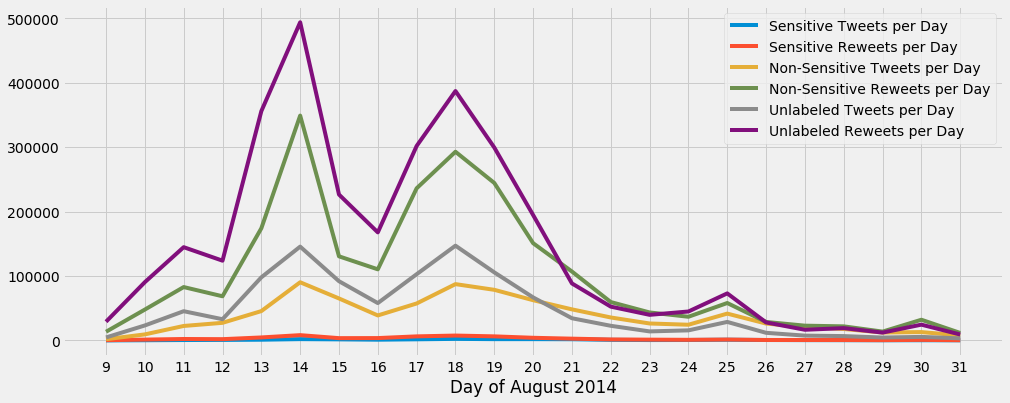

In [180]:
df_s1 = df_sc[df_sc['possibly_sensitive'] == True]
df_s1 = df_s1[df_s1['day_of_tweet'] > 8]
df_s1t = df_s1[df_s1['is_retweet'] == False]
df_s1r = df_s1[df_s1['is_retweet'] == True]
df_s2 = df_sc[df_sc['possibly_sensitive'] == False]
df_s2 = df_s2[df_s2['day_of_tweet'] > 8]
df_s2t = df_s2[df_s2['is_retweet'] == False]
df_s2r = df_s2[df_s2['is_retweet'] == True]
df_s3 = df_sc[(df_sc['possibly_sensitive'] != False) & (df_sc['possibly_sensitive'] != True)]
df_s3 = df_s3[df_s3['day_of_tweet'] > 8]
df_s3t = df_s3[df_s3['is_retweet'] == False]
df_s3r = df_s3[df_s3['is_retweet'] == True]
ax = df_s1t.plot(x='day_of_tweet',
             y='total',
             kind='line',
             figsize=(15,6),
             label='Sensitive Tweets per Day')
df_s1r.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Sensitive Reweets per Day',
             ax=ax)
df_s2t.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Non-Sensitive Tweets per Day',
             ax=ax)
df_s2r.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Non-Sensitive Reweets per Day',
             ax=ax)
df_s3t.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Unlabeled Tweets per Day',
             ax=ax)
df_s3r.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Unlabeled Reweets per Day',
             ax=ax)
plt.xlabel('Day of August 2014')

xticks = np.arange(9,32,1)
plt.xticks(xticks)

The behaviour of these categories follows the general trends. Since the scale of retweets seems to shadow the behavior of sensitive tweets, let's plot that separately.

([<matplotlib.axis.XTick at 0x122a6bd68>,
 <a list of 23 Text xticklabel objects>)

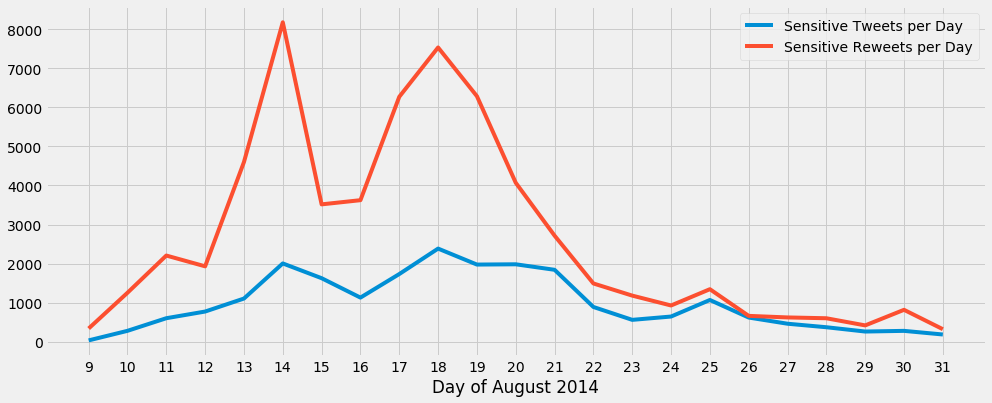

In [186]:
ax = df_s1t.plot(x='day_of_tweet',
             y='total',
             kind='line',
             figsize=(15,6),
             label='Sensitive Tweets per Day')
df_s1r.plot(x='day_of_tweet',
             y='total',
             kind='line',
             label='Sensitive Reweets per Day',
             ax=ax)
plt.xlabel('Day of August 2014')

xticks = np.arange(9,32,1)
plt.xticks(xticks)

Although the behaviour of retweets follows the general trend, the behaviour of original tweets doesn't. It appears much flatter, especially during the week of August 14th to the 21st. We'll use more advanced sentiment analysis techniques to figure out what made this period special.

### Hashtags

Since our project is going to gravitate around topic modeling, a good idea would be to understand the hashtags on the sample of tweets, as this will give us an idea of the topics that users believe will make their messages matter.

We started this by pulling hashtags of tweets that weren't retweets.

In [164]:
%%bigquery df_has
SELECT id, hashtags
    from tweets.all_valid_tweets
    where is_retweet = False;

In [165]:
#Now, let's make a list of individual hashtags, as a tweet might contain none
# or more than one.
themes = []
for i in range(0,len(df_has)):
    for k in range(0,len(df_has['hashtags'].iloc[i].replace('[','').replace(']','').replace('"','').split(','))):
        l = df_has['hashtags'].iloc[i].replace('[','').replace(']','').replace('"','').split(',')[k].strip().lower()
        themes.append(l)

In [170]:
themes = pd.DataFrame(themes)
themes['hashtags'] = themes
df_agg = themes.groupby(['hashtags']).agg(['count'])
df_themes = df_agg[0].sort_values(by='count', ascending=False)

In [228]:
len(themes)

3013621

There are several hashtags. Let us see in a bar plot what are the 15 most mentioned. 

In [214]:
df2_themes = df_themes[:14].copy()

new_row = pd.DataFrame(data = {
    'count' : [df_themes['count'][14:].sum()]
})

new_row.rename(index={0: 'other'}, inplace=True)

df2_themes = pd.concat([df2_themes, new_row])

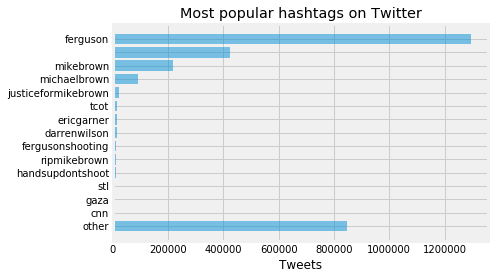

In [227]:
topics = list(df2_themes.index)
y_pos = np.arange(len(df2_themes))
count = list(df2_themes['count'])

plt.barh(y_pos, count, align='center', alpha=0.5)
plt.yticks(y_pos, topics)
plt.xlabel('Tweets')
plt.title('Most popular hashtags on Twitter')
plt.gca().invert_yaxis()

plt.show()

The most common hashtags were related to geography (Ferguson and St Louis), as well as to Michael Brown, the individual shot on August 9th. There are also several hashtags related to protests, justice and media. A large number of Tweets didn't mention any hashtags.

In [229]:
#Let's examine the 50 most relevant topics.
df_themes[:50]

,count
hashtags,
ferguson,1293741
,422648
mikebrown,219444
michaelbrown,92359
justiceformikebrown,22570
tcot,15955
ericgarner,15270
darrenwilson,15096
fergusonshooting,13602


It shows more detail, giving an insight into topics like racism, riots, and mentions of social organizations and movements like nmos14 and blacklivesmatter.